In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as py
import numpy as np

2023-04-04 23:55:27.403549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
data = pd.read_csv('data/complete_data.csv')

In [51]:
data['town']=data['town'].astype('category')
data['flat_type']=data['flat_type'].astype('category')
data['flat_model']=data['flat_model'].astype('category')

data = pd.get_dummies(data, drop_first=True)
data = data.reindex(columns = [col for col in data.columns if col != 'resale_price'] + ['resale_price'])

In [52]:
train_data = data[data["month_count"]<0.7892857142857143]
test_data = data[data["month_count"]>=0.7892857142857143]
train_x = train_data.iloc[: , :-1]
train_y = train_data.iloc[: , -1]
test_x = test_data.iloc[: , :-1]
test_y = test_data.iloc[: , -1]

In [6]:
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

def create_model():
    # create model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape = (62,)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation=None))
    # Compile model
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                  loss = tf.keras.losses.MeanSquaredError(), 
                  metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model
# fix random seed for reproducibility
seed = 1000
tf.random.set_seed(seed)

# create model
model = KerasRegressor(model=create_model, 
                       verbose=0, 
                       epochs=10,
                       optimizer='adam',
                       loss = tf.keras.losses.MeanSquaredError())

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
batch_size = [16, 32, 64, 128]
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit='r2', scoring=['r2'])
grid_result = grid.fit(train_x, train_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_r2']
stds = grid_result.cv_results_['std_test_r2']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2023-04-05 00:50:06.425619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 00:50:06.425639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 00:50:06.425649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Best: 0.842149 using {'batch_size': 32, 'optimizer__learning_rate': 0.1}
0.817810 (0.099415) with: {'batch_size': 16, 'optimizer__learning_rate': 0.001}
0.736963 (0.194538) with: {'batch_size': 16, 'optimizer__learning_rate': 0.01}
0.807406 (0.143037) with: {'batch_size': 16, 'optimizer__learning_rate': 0.1}
0.755994 (0.217007) with: {'batch_size': 32, 'optimizer__learning_rate': 0.001}
0.754511 (0.225959) with: {'batch_size': 32, 'optimizer__learning_rate': 0.01}
0.842149 (0.123525) with: {'batch_size': 32, 'optimizer__learning_rate': 0.1}
0.835427 (0.143350) with: {'batch_size': 64, 'optimizer__learning_rate': 0.001}
0.718918 (0.313776) with: {'batch_size': 64, 'optimizer__learning_rate': 0.01}
0.797936 (0.147875) with: {'batch_size': 64, 'optimizer__learning_rate': 0.1}
0.789875 (0.173016) with: {'batch_size': 128, 'optimizer__learning_rate': 0.001}
0.703106 (0.243494) with: {'batch_size': 128, 'optimizer__learning_rate': 0.01}
0.738707 (0.198708) with: {'batch_size': 128, 'optimize

In [53]:
batch_size=64
learning_rate=0.001

model_0 = tf.keras.models.Sequential()
model_0.add(tf.keras.Input(shape = (62,)))
model_0.add(tf.keras.layers.Dense(128, activation='relu'))
model_0.add(tf.keras.layers.Dense(256, activation='relu'))
model_0.add(tf.keras.layers.Dense(128, activation='relu'))
model_0.add(tf.keras.layers.Dense(64, activation='relu'))
model_0.add(tf.keras.layers.Dense(1, activation=None))

model_0.summary()

model_0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = [tf.keras.metrics.RootMeanSquaredError()])

model_0.fit(train_x, train_y, epochs = 100, verbose = True, batch_size = batch_size)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               8064      
                                                                 
 dense_77 (Dense)            (None, 256)               33024     
                                                                 
 dense_78 (Dense)            (None, 128)               32896     
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 dense_80 (Dense)            (None, 1)                 65        
                                                                 
Total params: 82,305
Trainable params: 82,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7684/7684 [==========================

7684/7684 [==============================] - 12s 2ms/step - loss: 395197632.0000 - root_mean_squared_error: 19879.5781
Epoch 55/100
7684/7684 [==============================] - 12s 2ms/step - loss: 394141152.0000 - root_mean_squared_error: 19852.9883
Epoch 56/100
7684/7684 [==============================] - 12s 2ms/step - loss: 393020064.0000 - root_mean_squared_error: 19824.7344
Epoch 57/100
7684/7684 [==============================] - 12s 2ms/step - loss: 390465952.0000 - root_mean_squared_error: 19760.2109
Epoch 58/100
7684/7684 [==============================] - 12s 2ms/step - loss: 389272256.0000 - root_mean_squared_error: 19729.9844
Epoch 59/100
7684/7684 [==============================] - 12s 2ms/step - loss: 387964800.0000 - root_mean_squared_error: 19696.8223
Epoch 60/100
7684/7684 [==============================] - 12s 2ms/step - loss: 386372672.0000 - root_mean_squared_error: 19656.3652
Epoch 61/100
7684/7684 [==============================] - 12s 2ms/step - loss: 385406688.

In [54]:
test_months = test_x["month_count"].unique()
    
test_x_months = []
test_y_months = []
for m in range(len(test_months)):
    test_x_1m = test_data[test_data["month_count"] == test_months[m]].iloc[: , :-1]
    test_y_1m = test_data[test_data["month_count"] == test_months[m]].iloc[: , -1]
    test_x_months.append(test_x_1m)
    test_y_months.append(test_y_1m)

In [55]:
R2 = []
RMSE = []
for i in range(len(test_x_months)):
    predictions = model_0.predict(test_x_months[i])
    R2.append(r2_score(test_y_months[i], predictions))
    RMSE.append(mean_squared_error(test_y_months[i], predictions)**0.5)

58/58 [==============================] - 0s 1ms/step


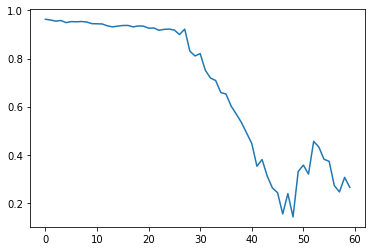

In [56]:
py.plot(R2)

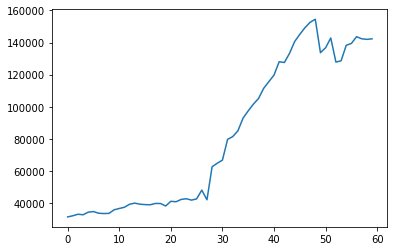

In [58]:
py.plot(RMSE)

In [59]:
results = pd.DataFrame({"R2":R2, "RMSE":RMSE})

In [60]:
results.to_csv("Data/ANN_results.csv", index=False)

81/81 [==============================] - 0s 922us/step


58/58 [==============================] - 0s 871us/step


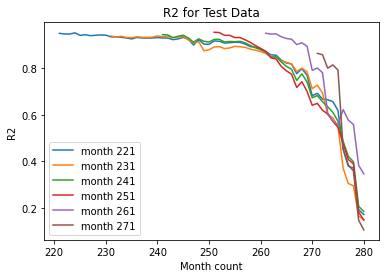

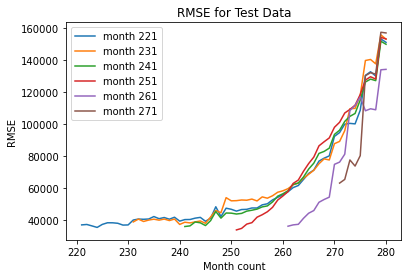

In [61]:
month_split = {0.7892857142857143:221,
               0.825:231,
               0.8607142857142858:241,
               0.8964285714285715:251,
               0.9321428571428572:261,
               0.9678571428571427:271}

batch_size=64
learning_rate=0.001

def create_model(): 
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape = (62,)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation=None))
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
                  loss = tf.keras.losses.MeanSquaredError(), 
                  metrics = [tf.keras.metrics.RootMeanSquaredError()])

R2_all={}
RMSE_all={}

for i,j in month_split.items():
    train_data = data[data["month_count"]<i]
    test_data = data[data["month_count"]>=i]
    train_x = train_data.iloc[: , :-1]
    train_y = train_data.iloc[: , -1]
    test_x = test_data.iloc[: , :-1]
    test_y = test_data.iloc[: , -1]
    test_months = test_x["month_count"].unique()

    create_model()
    model.fit(train_x, train_y, epochs = 20, verbose = False, batch_size = batch_size)
    
    test_x_months = []
    test_y_months = []
    for m in range(len(test_months)):
        test_x_1m = test_data[test_data["month_count"] == test_months[m]].iloc[: , :-1]
        test_y_1m = test_data[test_data["month_count"] == test_months[m]].iloc[: , -1]
        test_x_months.append(test_x_1m)
        test_y_months.append(test_y_1m)
    
    R2 = []
    RMSE = []
    for p in range(len(test_months)):
        predictions = model.predict(test_x_months[p])
        R2.append(r2_score(test_y_months[p], predictions))
        RMSE.append(mean_squared_error(test_y_months[p], predictions)**0.5)    
    R2_all[j] = R2
    RMSE_all[j] = RMSE

_, ax1 = py.subplots()
ax1.set_title("R2 for Test Data")
ax1.set_xlabel("Month count")
ax1.set_ylabel("R2")

_, ax2 = py.subplots()
ax2.set_title("RMSE for Test Data")
ax2.set_xlabel("Month count")
ax2.set_ylabel("RMSE") 
    
for i,j in R2_all.items():
    ax1.plot([n for n in range(i,i+len(j))], j, label = "month "+str(i))
ax1.legend()

for i,j in RMSE_all.items():
    ax2.plot([n for n in range(i,i+len(j))], j, label = "month "+str(i))
ax2.legend()

In [96]:
weights = []
for i in range(128):
    tmp_weights = np.absolute(model_0.layers[0].weights[0][:,i])
    most = max(tmp_weights)
    least = min(tmp_weights)
    scaled_weights = (tmp_weights-least)/(most-least)
    weights.append(scaled_weights)

In [97]:
score = []
for i in range(len(train_x.columns)):
    score.append(np.mean(np.absolute(model.layers[0].weights[0][i])))
score = pd.Series(data=score, index=train_x.columns)
print(score.sort_values(ascending = False).to_string())

floor_area_sqm                       0.574794
flat_model_terrace                   0.435806
dist_mrtlrt                          0.398370
remaining_lease                      0.321502
int_rate                             0.320140
month_count                          0.315917
flat_type_2_room                     0.284106
flat_type_executive                  0.274397
flat_model_premium_maisonette        0.227673
flat_type_5_room                     0.207948
dist_city                            0.188312
flat_type_3_room                     0.187501
town_marine_parade                   0.186731
town_sembawang                       0.185943
storey                               0.182761
flat_model_dbss                      0.180670
flat_model_type_s1                   0.180040
town_sengkang                        0.176147
flat_model_improved-maisonette       0.158854
town_bukit_panjang                   0.156664
town_bukit_timah                     0.154554
flat_type_multi_generation        

In [92]:
columns = train_x.columns
group_town = []
group_flat_type = []
group_flat_model = []
group_names = []
groups = []
for i in range(len(columns)):
    if columns[i].startswith('town'):
        group_town.append(i)
    elif columns[i].startswith('flat_type'):
        group_flat_type.append(i)
    elif columns[i].startswith('flat_model'):
        group_flat_model.append(i)
    else:
        group_names.append(columns[i])
        groups.append(i)
group_names.append('town')
group_names.append('flat_type')
group_names.append('flat_model')
groups.append(group_town)
groups.append(group_flat_type)
groups.append(group_flat_model)

In [93]:
try_data = train_data.sample(1000, random_state = 10)
try_x = try_data.iloc[: , :-1]
try_y = try_data.iloc[: , -1]

In [94]:
from mlxtend.evaluate import feature_importance_permutation

imp_vals, imp_all = feature_importance_permutation(
    predict_method=model_0.predict, 
    X=try_x.to_numpy(),
    y=try_y.to_numpy(),
    metric=r2_score,
    num_rounds=5,
    feature_groups=groups,
    seed=1)

32/32 [==============================] - 0s 1ms/step


In [95]:
rank_importance = pd.Series(data=imp_vals, index=group_names)
print(rank_importance.sort_values(ascending = False).to_string())

town                  1.598111
flat_type             1.518514
flat_model            1.500751
month_count           1.403820
floor_area_sqm        1.259261
dist_city             1.245926
remaining_lease       1.211406
storey                1.200437
dist_hawkercentres    1.197899
dist_mrtlrt           1.196093
int_rate              1.195975
dist_phpcs            1.192615
dist_supermarkets     1.192576
dist_schools          1.191380


In [77]:
train_data = data[data["month_count"]<0.657142857142857]
test_data = data[(data["month_count"]>=0.657142857142857) & (data["month_count"]<0.871428571428571)]
train_x = train_data.iloc[: , :-1]
train_y = train_data.iloc[: , -1]
test_x = test_data.iloc[: , :-1]
test_y = test_data.iloc[: , -1]

In [67]:
batch_size=64
learning_rate=0.001

model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.Input(shape = (62,)))
model_1.add(tf.keras.layers.Dense(128, activation='relu'))
model_1.add(tf.keras.layers.Dense(256, activation='relu'))
model_1.add(tf.keras.layers.Dense(128, activation='relu'))
model_1.add(tf.keras.layers.Dense(64, activation='relu'))
model_1.add(tf.keras.layers.Dense(1, activation=None))
model_1.summary()

model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = [tf.keras.metrics.RootMeanSquaredError()])

model_1.fit(train_x, train_y, epochs = 100, verbose = True, batch_size = batch_size)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 128)               8064      
                                                                 
 dense_112 (Dense)           (None, 256)               33024     
                                                                 
 dense_113 (Dense)           (None, 128)               32896     
                                                                 
 dense_114 (Dense)           (None, 64)                8256      
                                                                 
 dense_115 (Dense)           (None, 1)                 65        
                                                                 
Total params: 82,305
Trainable params: 82,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6767/6767 [==========================

6767/6767 [==============================] - 11s 2ms/step - loss: 342268768.0000 - root_mean_squared_error: 18500.5078
Epoch 55/100
6767/6767 [==============================] - 10s 2ms/step - loss: 341254496.0000 - root_mean_squared_error: 18473.0742
Epoch 56/100
6767/6767 [==============================] - 10s 2ms/step - loss: 341291008.0000 - root_mean_squared_error: 18474.0625
Epoch 57/100
6767/6767 [==============================] - 10s 2ms/step - loss: 340450656.0000 - root_mean_squared_error: 18451.3047
Epoch 58/100
6767/6767 [==============================] - 10s 2ms/step - loss: 340076480.0000 - root_mean_squared_error: 18441.1621
Epoch 59/100
6767/6767 [==============================] - 11s 2ms/step - loss: 340157600.0000 - root_mean_squared_error: 18443.3613
Epoch 60/100
6767/6767 [==============================] - 10s 2ms/step - loss: 338036256.0000 - root_mean_squared_error: 18385.7617
Epoch 61/100
6767/6767 [==============================] - 10s 2ms/step - loss: 338613920.

In [68]:
test_months = test_x["month_count"].unique()
    
test_x_months = []
test_y_months = []
for m in range(len(test_months)):
    test_x_1m = test_data[test_data["month_count"] == test_months[m]].iloc[: , :-1]
    test_y_1m = test_data[test_data["month_count"] == test_months[m]].iloc[: , -1]
    test_x_months.append(test_x_1m)
    test_y_months.append(test_y_1m)

In [89]:
R2 = []
RMSE = []
for i in range(len(test_x_months)):
    predictions = model_1.predict(test_x_months[i])
    R2.append(r2_score(test_y_months[i], predictions))
    RMSE.append(mean_squared_error(test_y_months[i], predictions)**0.5)

60/60 [==============================] - 0s 938us/step


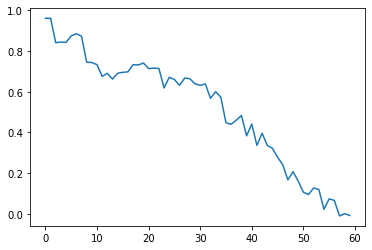

In [90]:
py.plot(R2)

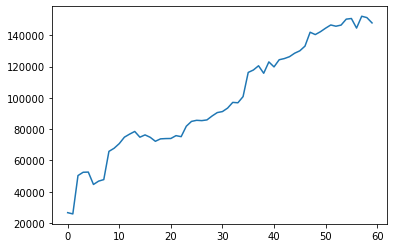

In [91]:
py.plot(RMSE)

In [83]:
results = pd.DataFrame({"R2":R2, "RMSE":RMSE})

In [84]:
results.to_csv("Data/ANN_results(untill_2019).csv", index=False)

In [73]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True)
train_x = train_data.iloc[: , :-1]
train_y = train_data.iloc[: , -1]
test_x = test_data.iloc[: , :-1]
test_y = test_data.iloc[: , -1]

In [75]:
batch_size=64
learning_rate=0.001

model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.Input(shape = (62,)))
model_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_2.add(tf.keras.layers.Dense(256, activation='relu'))
model_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation=None))

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = [tf.keras.metrics.RootMeanSquaredError()])

model_2.fit(train_x, train_y, epochs = 100, verbose = True, batch_size = batch_size)

Epoch 1/100
7710/7710 [==============================] - 13s 2ms/step - loss: 5428308992.0000 - root_mean_squared_error: 73677.0625
Epoch 2/100
7710/7710 [==============================] - 13s 2ms/step - loss: 1774754944.0000 - root_mean_squared_error: 42127.8398
Epoch 3/100
7710/7710 [==============================] - 16s 2ms/step - loss: 1063207744.0000 - root_mean_squared_error: 32606.8672
Epoch 4/100
7710/7710 [==============================] - 14s 2ms/step - loss: 846652416.0000 - root_mean_squared_error: 29097.2930
Epoch 5/100
7710/7710 [==============================] - 13s 2ms/step - loss: 779744896.0000 - root_mean_squared_error: 27923.9121
Epoch 6/100
7710/7710 [==============================] - 13s 2ms/step - loss: 737354048.0000 - root_mean_squared_error: 27154.2637
Epoch 7/100
7710/7710 [==============================] - 12s 2ms/step - loss: 709398528.0000 - root_mean_squared_error: 26634.5371
Epoch 8/100
7710/7710 [==============================] - 14s 2ms/step - loss: 68

7710/7710 [==============================] - 12s 2ms/step - loss: 491100512.0000 - root_mean_squared_error: 22160.7871
Epoch 64/100
7710/7710 [==============================] - 12s 2ms/step - loss: 489693376.0000 - root_mean_squared_error: 22129.0176
Epoch 65/100
7710/7710 [==============================] - 12s 1ms/step - loss: 487634016.0000 - root_mean_squared_error: 22082.4375
Epoch 66/100
7710/7710 [==============================] - 12s 2ms/step - loss: 487460224.0000 - root_mean_squared_error: 22078.5020
Epoch 67/100
7710/7710 [==============================] - 12s 2ms/step - loss: 485508576.0000 - root_mean_squared_error: 22034.2598
Epoch 68/100
7710/7710 [==============================] - 12s 2ms/step - loss: 483326944.0000 - root_mean_squared_error: 21984.6973
Epoch 69/100
7710/7710 [==============================] - 14s 2ms/step - loss: 481450976.0000 - root_mean_squared_error: 21941.9902
Epoch 70/100
7710/7710 [==============================] - 18s 2ms/step - loss: 480435616.

In [76]:
prediction = model_2.predict(test_x)
print(r2_score(test_y, prediction))
print(mean_squared_error(test_y, prediction)**0.5)

3855/3855 [==============================] - 4s 895us/step
0.98137321733702
21731.82387780105
